# 1-Pytorch简介和安装 以及基本使用方法

In [72]:
import torch 
torch.__version__ 
import torch.nn as nn

初始化矩阵

In [73]:
print(torch.empty(5,3)) # 矩阵
print(torch.rand(5,3)) # 随机值
print(torch.zeros(5,3,dtype = torch.long)) # 0矩阵

tensor([[4.5095e+27, 7.6831e+31, 4.7429e+30],
        [1.8060e+17, 4.7429e+30, 1.2567e+19],
        [4.5450e+30, 1.8524e+28, 1.8056e+17],
        [2.9390e+29, 2.0705e-19, 4.4721e+21],
        [1.8428e+28, 2.0615e-19, 2.3083e-12]])
tensor([[0.0179, 0.8981, 0.2662],
        [0.4276, 0.9251, 0.4846],
        [0.7157, 0.6824, 0.0296],
        [0.4427, 0.1076, 0.5322],
        [0.5316, 0.4843, 0.8953]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


直接传入数据转为tensor

In [74]:
x = torch.tensor([1,2,3])
x = x.new_ones(5,3,dtype = torch.double) #
x = torch.randn_like(x, dtype = torch.float) #
print(x)


tensor([[ 0.5683,  0.7153, -0.0403],
        [-1.6468, -1.8508,  0.8119],
        [ 0.3635,  2.2511,  0.8165],
        [ 0.0953, -0.8400,  0.0270],
        [-1.5536, -1.0685, -0.4342]])


大小矩阵

In [75]:
x.size()

torch.Size([5, 3])

基本计算方法

In [76]:
# +
y = torch.rand(5,3)
print(torch.add(x,y))

tensor([[ 1.3407,  0.7453,  0.8499],
        [-0.8602, -1.0327,  1.5909],
        [ 0.7389,  2.6114,  1.2588],
        [ 0.2915, -0.1627,  0.4089],
        [-0.6031, -0.2653, -0.0119]])


In [77]:
# idex
x[:,1]
# view 操作改变矩阵维度
x = torch.randn(4,4)
print(x)
y = x.view(16)
z = x.view(-1,8)
print(x.size(),y.size(),z.size())
print(y,z)

tensor([[ 0.0520,  0.9016, -0.4027, -1.0077],
        [-1.6277, -1.2799,  2.2543,  1.6226],
        [ 0.0564,  0.6934, -1.3009, -1.9874],
        [ 0.1324,  1.2311,  1.2510, -1.0060]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([ 0.0520,  0.9016, -0.4027, -1.0077, -1.6277, -1.2799,  2.2543,  1.6226,
         0.0564,  0.6934, -1.3009, -1.9874,  0.1324,  1.2311,  1.2510, -1.0060]) tensor([[ 0.0520,  0.9016, -0.4027, -1.0077, -1.6277, -1.2799,  2.2543,  1.6226],
        [ 0.0564,  0.6934, -1.3009, -1.9874,  0.1324,  1.2311,  1.2510, -1.0060]])


与numpy协同操作

In [78]:
import numpy as np
a = torch.ones(5)
b = a.numpy()
print(b)
a = np.ones(5)
b = torch.from_numpy(a)
print(b)


[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


# autograd 自动求导机制

In [79]:
x = torch.randn(3,4, requires_grad=True)
# 或者
x

tensor([[-0.0782,  0.2165,  1.0005,  1.5464],
        [-1.7331, -1.0930, -1.5060, -1.8128],
        [ 1.0754,  0.7065,  0.4899,  1.9898]], requires_grad=True)

In [80]:
b = torch.randn(3,4)
b.requires_grad=True
b

tensor([[-0.2222,  0.8666, -0.0630,  0.3908],
        [-0.7190,  0.4560, -0.1726,  0.4774],
        [ 1.1789, -0.7502, -1.2822, -0.0189]], requires_grad=True)

In [81]:
t = x + b
y = t.sum()
y

tensor(0.9434, grad_fn=<SumBackward0>)

In [82]:
y.backward()
b.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

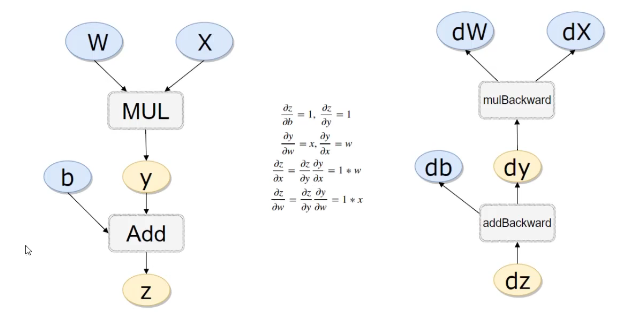

In [83]:
x = torch.rand(1)
b = torch.rand(1,requires_grad=True)
w = torch.rand(1,requires_grad=True)
y =w*x
z = y+b 

In [84]:
x.requires_grad, b.requires_grad, w.requires_grad, y.requires_grad

(False, True, True, True)

In [85]:
x.is_leaf, w.is_leaf,b.is_leaf, y.is_leaf, z.is_leaf


(True, True, True, False, False)

反向传播计算

In [86]:
z.backward(retain_graph=True) # 如果不清空会累加起来

In [87]:
w.grad

tensor([0.1092])

In [88]:
b.grad

tensor([1.])

# 做一个线性回归

构造一组输入数据x和对应的标签y

In [89]:
x_values = [i for i in range(11)]
x_train = np.array(x_values,dtype = np.float32)
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [90]:
y_values = [2*i for i in x_values]
y_train = np.array(y_values,dtype = np.float32)
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

构建线性回归，不加激活函数的全连接层

In [91]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self,x):
        out = self.linear(x)
        return out

In [92]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

指定好参数和损失函数

In [93]:
epochs = 1000
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
## 分类：交叉熵
## 常规任务：MSELoss

训练模型

In [94]:
for epoch in range(epochs):
    # 转为tensor

    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)
    # 梯度清理
    optimizer.zero_grad()
    #前向传播
    outputs = model(inputs) 
    # 计算损失
    loss = criterion(outputs, labels)
    # 反向传播
    loss.backward()
    # 更新权重参数
    optimizer.step()
    if epoch % 50 ==0:
        print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 269.0664978027344
epoch 50, loss 0.009603780694305897
epoch 100, loss 0.00547763891518116
epoch 150, loss 0.0031242307741194963
epoch 200, loss 0.0017819495406001806
epoch 250, loss 0.0010163555853068829
epoch 300, loss 0.0005796881741844118
epoch 350, loss 0.0003306333674117923
epoch 400, loss 0.00018857931718230247
epoch 450, loss 0.00010755899711512029
epoch 500, loss 6.134892464615405e-05
epoch 550, loss 3.4989381674677134e-05
epoch 600, loss 1.995865568460431e-05
epoch 650, loss 1.1382646334823221e-05
epoch 700, loss 6.492643933597719e-06
epoch 750, loss 3.7029062696092296e-06
epoch 800, loss 2.111964022333268e-06
epoch 850, loss 1.2044253026033402e-06
epoch 900, loss 6.870912443446286e-07
epoch 950, loss 3.917944582099153e-07


测试预测结果

In [24]:
predicated = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicated

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

模型保存


In [ ]:
torch.save(model.state_dict(),"model.pkl")
model.load_state_dict(torch.load("model.pkl"))

<All keys matched successfully>